In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("HTRU_2.csv",header=None)

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,min_samples_split=5,max_features=4,max_depth=110)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=110, max_features=4, min_samples_split=5,
                       n_estimators=200)

In [7]:
y_pred = rfc.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
#~92% TPR

[[4072   28]
 [  44  331]]


0.9839106145251396

In [ ]:
cm[0][1]

In [ ]:
predicted = rfc.predict_proba(X_test)

In [ ]:
predicted = (predicted[:,1]>=.4).astype('int')

In [ ]:
predicted

In [ ]:
cm = confusion_matrix(y_test, predicted)
print(cm)
accuracy_score(y_test, predicted)

In [ ]:
#1. make a list of valuers evenly spaced between 0 and 100
#2. make a for loop that iterates through the list
#3. For each iteration I need to collect the model accuracy, TPR, difference between them, and the value of the list

In [9]:
temp_list = [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]
acc_lst = []
tpr_lst = []
diff_lst = []
thresh_lst = []
for thresh in temp_list:
    pred_prob = rfc.predict_proba(X_test)
    pred_prob = (pred_prob[:,1]>=thresh).astype('int')
    cm = confusion_matrix(y_test, pred_prob)
    acc_lst.append(accuracy_score(y_test, pred_prob))
    tpr_lst.append(cm[1][1]/(cm[1][1]+cm[0][1]))
    thresh_lst.append(thresh)

In [ ]:
acc_lst

In [ ]:
tpr_lst

In [ ]:
thresh_lst

In [ ]:
import numpy as np
arr = np.linspace(0.01,1,40)

In [ ]:
t_list = arr.tolist()
t_list

In [ ]:
acc_lst = []
tpr_lst = []
diff_lst = []
thresh_lst = []
for thresh in t_list:
    pred_prob = []
    pred_prob = rfc.predict_proba(X_test)
    pred_prob = (pred_prob[:,1]>=thresh).astype('int')
    cm = confusion_matrix(y_test, pred_prob)
    acc_lst.append(accuracy_score(y_test, pred_prob))
    tpr_lst.append(cm[1][1]/(cm[1][1]+cm[0][1]))
    thresh_lst.append(thresh)
    print(thresh)

In [ ]:
acc_lst

In [ ]:
tpr_lst

In [13]:
random_forest = pd.DataFrame(
    {
        'Threshold':thresh_lst,
        'Accuracy':acc_lst,
        'Sensitivity':tpr_lst
    })

In [ ]:
random_forest.head()

In [14]:
random_forest['Diff'] = random_forest['Accuracy'] - random_forest['Sensitivity']

In [ ]:
random_forest.head()

In [11]:
import matplotlib.pyplot as plt

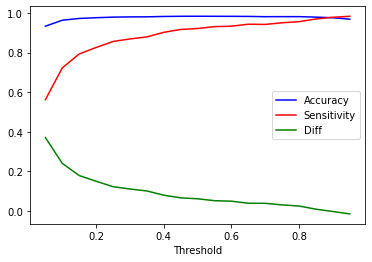

In [15]:
ax = plt.gca()

random_forest.plot(kind='line',x='Threshold',y='Accuracy',color='blue',ax=ax)
random_forest.plot(kind='line',x='Threshold',y='Sensitivity',color='red',ax=ax)
random_forest.plot(kind='line',x='Threshold',y='Diff',color='green',ax=ax)
plt.show()

In [ ]:
random_forest.to_csv('prob_plot.csv',index=False)